# Support Vector Regression For Nigerian Population Growth Rate

In [0]:
import pandas as pd
import numpy as np
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [0]:
series = pd.read_csv('PopulationRate1.csv', header=0 )

In [0]:
series.columns

Index(['Date', 'Urban population (% of total population)', 'Urban population',
       'Urban population growth (annual %)',
       'Rural population (% of total population)',
       'Rural population growth (annual %)', 'Rural population',
       'Population, male (% of total population)', 'Population, male',
       'Population, female (% of total population)', 'Population, female',
       'Population, total', 'Population growth (annual %)'],
      dtype='object')

In [0]:
series.columns = ['Date','UP%','UP','UPG','RP%','RPG','RP','PM%','PM','PF%','PF','PT','PGA%']

In [0]:
series.head()

,Date,UP%,UP,UPG,RP%,RPG,RP,PM%,PM,PF%,PF,PT,PGA%
0,1960,15.410,6955836,6.815307,84.590,1.118942,38182622,49.914966,22530846,50.085034,22607612,45138458,1.975879
1,1961,15.633,7201117,3.465513,84.367,1.764790,38862446,49.922674,22996163,50.077326,23067400,46063563,2.028764
2,1962,15.858,7457989,3.504965,84.142,1.808919,39571833,49.931301,23482602,50.068699,23547220,47029822,2.075966
3,1963,16.087,7727058,3.544239,83.913,1.837969,40305876,49.940460,23987868,50.059540,24045066,48032934,2.110499
4,1964,16.318,8006714,3.555224,83.682,1.853827,41060046,49.949726,24508712,50.050274,24558048,49066760,2.129492


In [0]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
Date    59 non-null int64
UP%     59 non-null float64
UP      59 non-null int64
UPG     59 non-null float64
RP%     59 non-null float64
RPG     59 non-null float64
RP      59 non-null int64
PM%     59 non-null float64
PM      59 non-null int64
PF%     59 non-null float64
PF      59 non-null int64
PT      59 non-null int64
PGA%    59 non-null float64
dtypes: float64(7), int64(6)
memory usage: 6.1 KB


In [0]:
series.describe()

,Date,UP%,UP,UPG,RP%,RPG,RP,PM%,PM,PF%,PF,PT,PGA%
count,59.000000,59.000000,5.900000e+01,59.000000,59.000000,59.000000,5.900000e+01,59.000000,5.900000e+01,59.000000,5.900000e+01,5.900000e+01,59.000000
mean,1989.000000,29.534441,3.463558e+07,4.609757,70.465559,1.603785,6.689331e+07,50.289259,5.115449e+07,49.710741,5.037440e+07,1.015289e+08,2.521186
std,17.175564,10.745748,2.634755e+07,0.720013,10.745748,0.411253,1.834157e+07,0.229339,2.245890e+07,0.229339,2.168540e+07,4.414421e+07,0.229124
min,1960.000000,15.410000,6.955836e+06,3.465513,49.656000,0.938766,3.818262e+07,49.914966,2.253085e+07,49.336114,2.260761e+07,4.513846e+07,1.975879
25%,1974.500000,19.571500,1.223899e+07,4.094746,62.216000,1.182281,5.028674e+07,50.060220,3.130064e+07,49.529045,3.122510e+07,6.252574e+07,2.488851
50%,1989.000000,28.842000,2.676192e+07,4.644999,71.158000,1.691337,6.602610e+07,50.294687,4.666745e+07,49.705313,4.612058e+07,9.278803e+07,2.559662
75%,2003.500000,37.784000,5.049072e+07,4.963414,80.428500,1.857319,8.311981e+07,50.470955,6.743465e+07,49.939780,6.617588e+07,1.336105e+08,2.639796
max,2018.000000,50.344000,9.861118e+07,6.815307,84.590000,2.478562,9.726356e+07,50.663886,9.923776e+07,50.085034,9.663698e+07,1.958747e+08,3.031979


In [0]:
series.shape

(59, 13)

In [0]:
srs = series['PGA%']
srs.head()

0    1.975879
1    2.028764
2    2.075966
3    2.110499
4    2.129492
Name: PGA%, dtype: float64

In [0]:
srs = np.array(srs).reshape((-1, 1))

In [0]:
from sklearn import preprocessing
# normalize features - 

# Create the Scaler object
#scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
#srs['std_Pop'] = scaler.fit_transform(srs[1])
print(srs)

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(srs)
srs = pd.DataFrame(scaled)

[[1.97587942]
 [2.02876366]
 [2.07596641]
 [2.11049895]
 [2.12949192]
 [2.13963384]
 [2.15123474]
 [2.17130539]
 [2.19939007]
 [2.23776997]
 [2.28576227]
 [2.32151869]
 [2.36091003]
 [2.43960865]
 [2.56608034]
 [2.71444252]
 [2.87289137]
 [2.99324954]
 [3.03197919]
 [2.97137514]
 [2.84925219]
 [2.70984333]
 [2.59983162]
 [2.53426438]
 [2.52887969]
 [2.5624216 ]
 [2.60290443]
 [2.6255174 ]
 [2.63094703]
 [2.6125658 ]
 [2.57930985]
 [2.54594937]
 [2.52157756]
 [2.5033469 ]
 [2.49341393]
 [2.48991447]
 [2.48891699]
 [2.48878512]
 [2.49131878]
 [2.496357  ]
 [2.50384697]
 [2.51161654]
 [2.52151511]
 [2.53725455]
 [2.55966188]
 [2.58568909]
 [2.61084383]
 [2.63217326]
 [2.64986429]
 [2.66291669]
 [2.67144293]
 [2.67788383]
 [2.68091356]
 [2.67690033]
 [2.66501917]
 [2.6474192 ]
 [2.62770266]
 [2.60767639]
 [2.58654585]]


In [0]:
# Fix the moving window size to be 5
window_size = 5

srs_s = srs.copy()
for i in range(window_size):
    srs = pd.concat([srs, srs_s.shift(-(i+1))], axis = 1)
 # I dropped all the rows that contain the Nan values in the code snippet.   
srs.dropna(axis=0, inplace=True)

In [0]:
srs.head()

,0,0,0,0,0,0
0,-1.000000,-0.899850,-0.810459,-0.745063,-0.709095,-0.689888
1,-0.899850,-0.810459,-0.745063,-0.709095,-0.689888,-0.667919
2,-0.810459,-0.745063,-0.709095,-0.689888,-0.667919,-0.629910
3,-0.745063,-0.709095,-0.689888,-0.667919,-0.629910,-0.576724
4,-0.709095,-0.689888,-0.667919,-0.629910,-0.576724,-0.504042


In [0]:
srs.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'y']

In [0]:
srs.head()

,x1,x2,x3,x4,x5,y
0,-1.000000,-0.899850,-0.810459,-0.745063,-0.709095,-0.689888
1,-0.899850,-0.810459,-0.745063,-0.709095,-0.689888,-0.667919
2,-0.810459,-0.745063,-0.709095,-0.689888,-0.667919,-0.629910
3,-0.745063,-0.709095,-0.689888,-0.667919,-0.629910,-0.576724
4,-0.709095,-0.689888,-0.667919,-0.629910,-0.576724,-0.504042


In [0]:
X = srs.iloc[:,:-1].values
y = srs.iloc[:,-1].values

In [0]:
X.shape

(54, 5)

In [0]:
y.shape

(54,)

In [0]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

In [0]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

#from sklearn.svm import SVR  

#svrlassifier = SVR(kernel='linear')  
#svrlassifier.fit(X_train, y_train) 


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
preds = regressor.predict(X_test) 

In [0]:
from sklearn.metrics import accuracy_score
forecast_errors = [y_test[i]-preds[i] for i in range(len(preds))]
bias = sum(forecast_errors) * 1.0/len(y_test)
mae = mean_absolute_error(y_test,preds)  
mse = mean_squared_error(y_test,preds)

rmse = np.sqrt(mse)  


In [0]:
print('BIAS: %f' % bias)
print('MAE: %f' % mae)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)


BIAS: 0.023172
MAE: 0.098909
MSE: 0.020759
RMSE: 0.144079


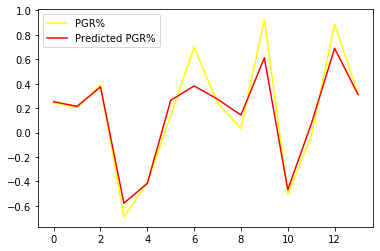

In [0]:
#6 Visualising the Support Vector Regression results
plt.plot(y_test, color = 'yellow', label = 'PGR%')
plt.plot(preds, color = 'red', label = 'Predicted PGR%')
plt.legend()
pyplot.show()

#AdaBoostRegressor


In [0]:

from sklearn.ensemble import AdaBoostRegressor


from sklearn.svm import SVR
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svr=SVR(kernel='linear')

# Create adaboost Regressor object
abc =AdaBoostRegressor(n_estimators=50, base_estimator=svr,learning_rate=1)

# Train Adaboost Regressor
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
preds = model.predict(X_test)

In [0]:
adab_svr_actuals = y_test

In [0]:
forecast_errors = [y_test[i]-preds[i] for i in range(len(preds))]
bias = sum(forecast_errors) * 1.0/len(y_test)
mae = mean_absolute_error(y_test,preds)  
mse = mean_squared_error(y_test,preds)

rmse = np.sqrt(mse)  


In [0]:
print('BIAS: %f' % bias)
print('MAE: %f' % mae)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)


BIAS: 0.006338
MAE: 0.084945
MSE: 0.012408
RMSE: 0.111390


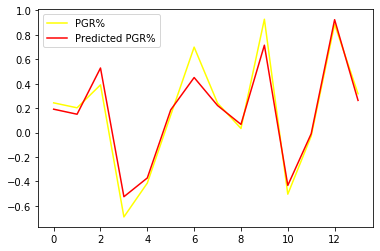

In [0]:
plt.plot(y_test, color = 'yellow', label = 'PGR%')
plt.plot(preds, color = 'red', label = 'Predicted PGR%')
plt.legend()
pyplot.show()